▎Описание датасета

Формат файла: CSV (значения, разделённые запятыми)

Описание:

Исторические данные за 1 минуту с нескольких бирж, охватывающие всю торговую историю BTCUSD, доступные через их конечные точки API. Этот набор данных обновляется ежедневно, чтобы обеспечить актуальность информации.

▎Время открытия

Метка времени в формате даты UTC, когда свеча (ценовой бар) открывается.

▎Открытие

Цена актива в начале торгового периода.

▎Максимум

Самая высокая цена актива за время торгового периода.

▎Минимум

Самая низкая цена актива за время торгового периода.

▎Закрытие

Цена актива в конце торгового периода.

▎Объем

Общий объем актива, проданный за период.

▎Время закрытия

Метка времени в формате даты UTC, когда свеча (ценовой бар) закрывается.

▎Объем котируемого актива

Общий объем торгов в котируемом активе (например, USDT) за период.

▎Количество сделок

Количество сделок, совершённых за период.

▎Объём базового актива, купленного тейкерами

Общая сумма базового актива (например, BTC), купленная тейкерами за период.

▎Источник данных и достоверность данных

Данные являются достоверными, т.к. представляют собой данные полученные с биржи.

Источник: https://www.kaggle.com/datasets/imranbukhari/comprehensive-btcusd-1m-data/data

▎Описание задачи анализа

Цель анализа данного датасета заключается в исследовании исторических данных о ценах Bitcoin для выявления тенденций, закономерностей и факторов, влияющих на динамику стоимости криптовалюьы.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Загружаем данные, исключая колонки с датами открытия и закрытия.
columns_to_exclude = ['Open time', 'Close time', "Ignore"]
btc=pd.read_csv("btc.csv", usecols=lambda column: column not in columns_to_exclude)
btc.head()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3.0,0.075183,320.390851
1,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0.0,0.000000,0.000000
2,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2.0,0.261074,1117.542921
3,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3.0,0.012008,51.171852
4,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1.0,0.140796,599.999338


Проверка данных на целостность.

In [3]:
btc.info()
btc.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781697 entries, 0 to 2781696
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Open                          float64
 1   High                          float64
 2   Low                           float64
 3   Close                         float64
 4   Volume                        float64
 5   Quote asset volume            float64
 6   Number of trades              float64
 7   Taker buy base asset volume   float64
 8   Taker buy quote asset volume  float64
dtypes: float64(9)
memory usage: 191.0 MB


Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Quote asset volume              1
Number of trades                1
Taker buy base asset volume     1
Taker buy quote asset volume    1
dtype: int64

Имеюются пропущенные значения, но их кол-во невелико, следовательно просто опустим их.

In [4]:
btc=btc.dropna()
btc.isnull().sum()

Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
dtype: int64

Вычислим СКО

In [5]:
btc.std()

Open                            1.684189e+04
High                            1.685312e+04
Low                             1.683072e+04
Close                           1.684190e+04
Volume                          8.302294e+01
Quote asset volume              2.023336e+06
Number of trades                1.420936e+03
Taker buy base asset volume     4.235857e+01
Taker buy quote asset volume    1.036625e+06
dtype: float64

Вычислим среднее

In [6]:
btc.mean()

Open                            1.946908e+04
High                            1.948242e+04
Low                             1.945563e+04
Close                           1.946907e+04
Volume                          4.649206e+01
Quote asset volume              1.001693e+06
Number of trades                8.255488e+02
Taker buy base asset volume     2.313550e+01
Taker buy quote asset volume    4.958910e+05
dtype: float64

Теперь построим гистограмму распределений значений

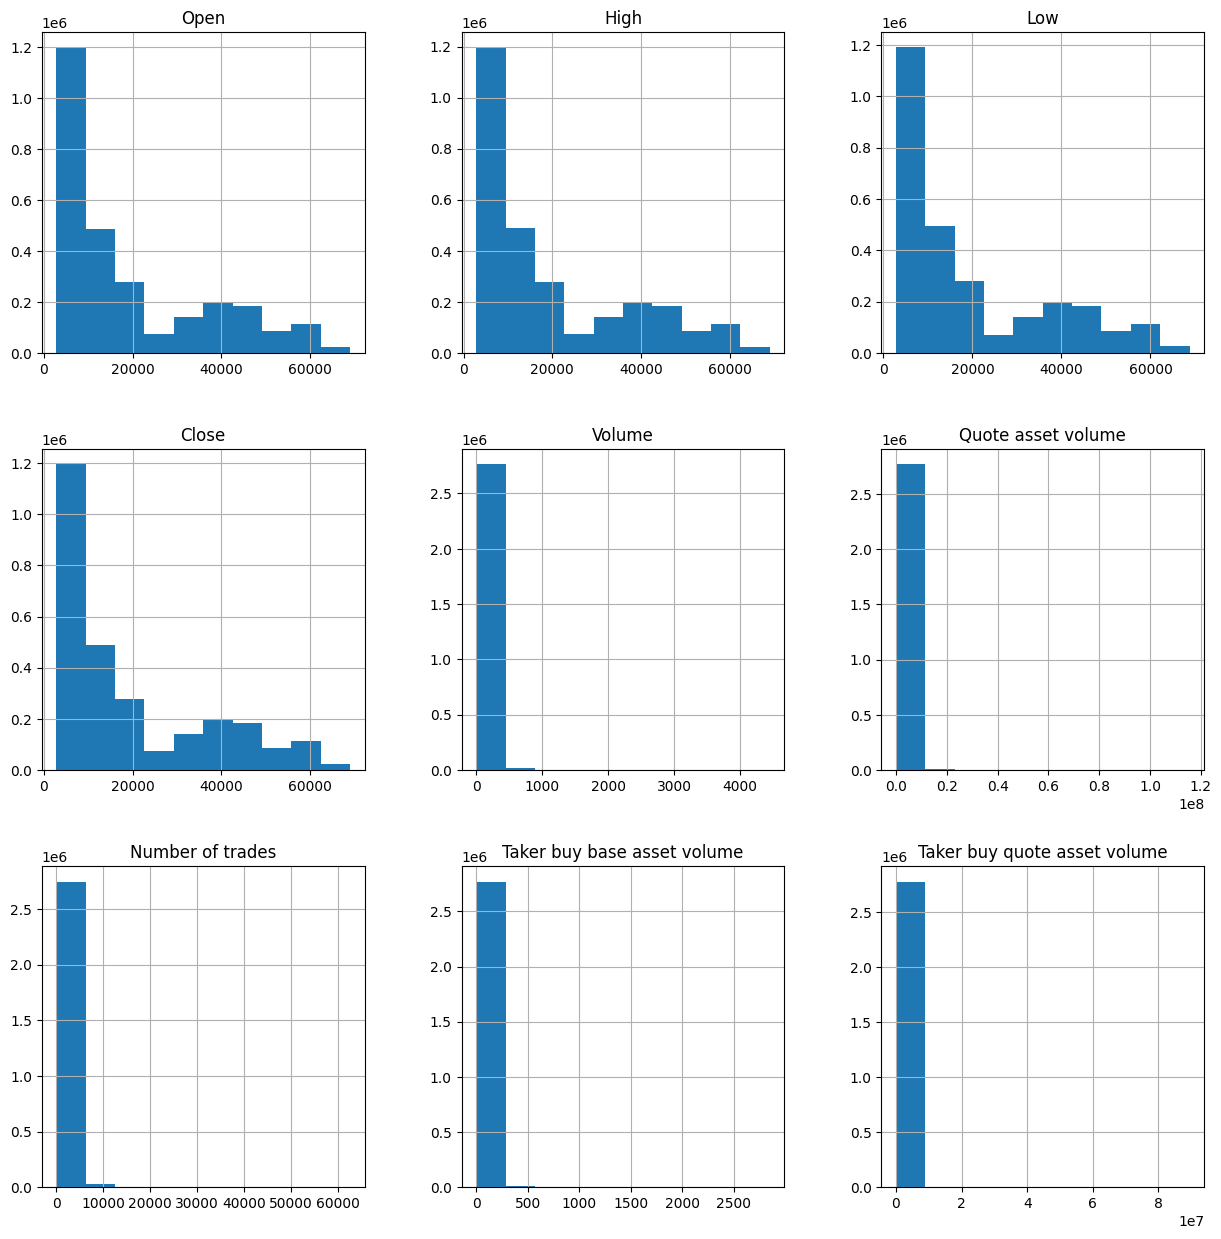

In [7]:
axes=btc.hist(layout=(3,3), figsize=(15,15))

Для нахождения выбросов, воспользуемся "Ящиком с усами"

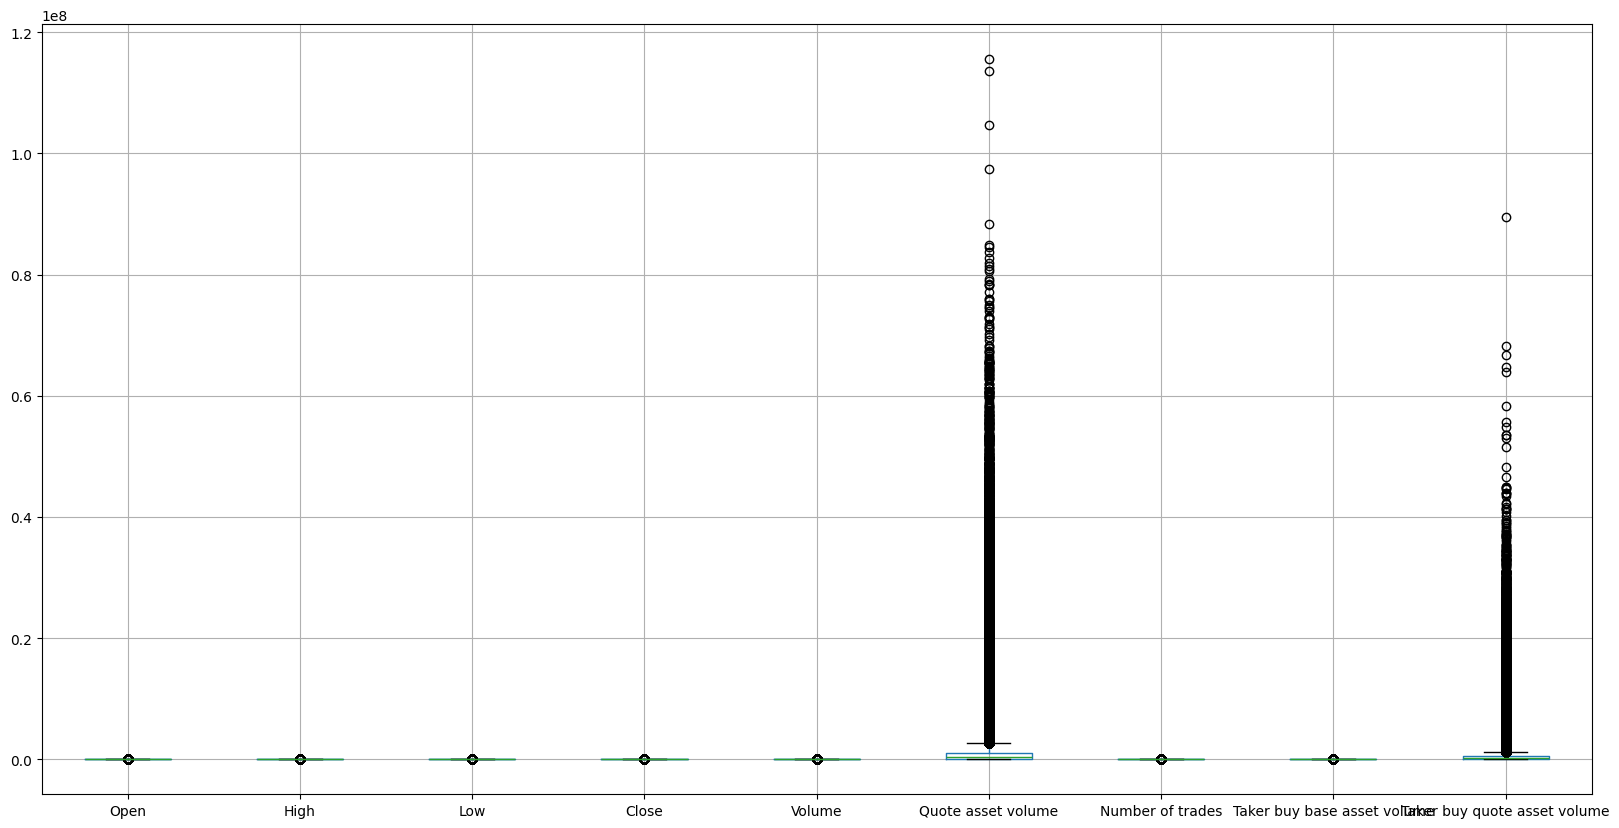

In [8]:
box_plot=btc.boxplot(figsize=(20,10))

Вывод:  Более всего выбросов наблюдается по показателю объема и показателю покупок актива тейкерами. Связано это с тем, что биткоин имеет тенденции к импульсным движениям, соответсвенно при резком падении/взлете трейдеры в разных объемах начинают скупать/продавать этот актив. Также необходимо учитывать рост популярности актива в период с 2017(никто о нем не знает) до 2022(знают практически все), поэтому есть выбросы в объеме котируемого актива.

▎Корреляция.

Построим графики рассеивания:

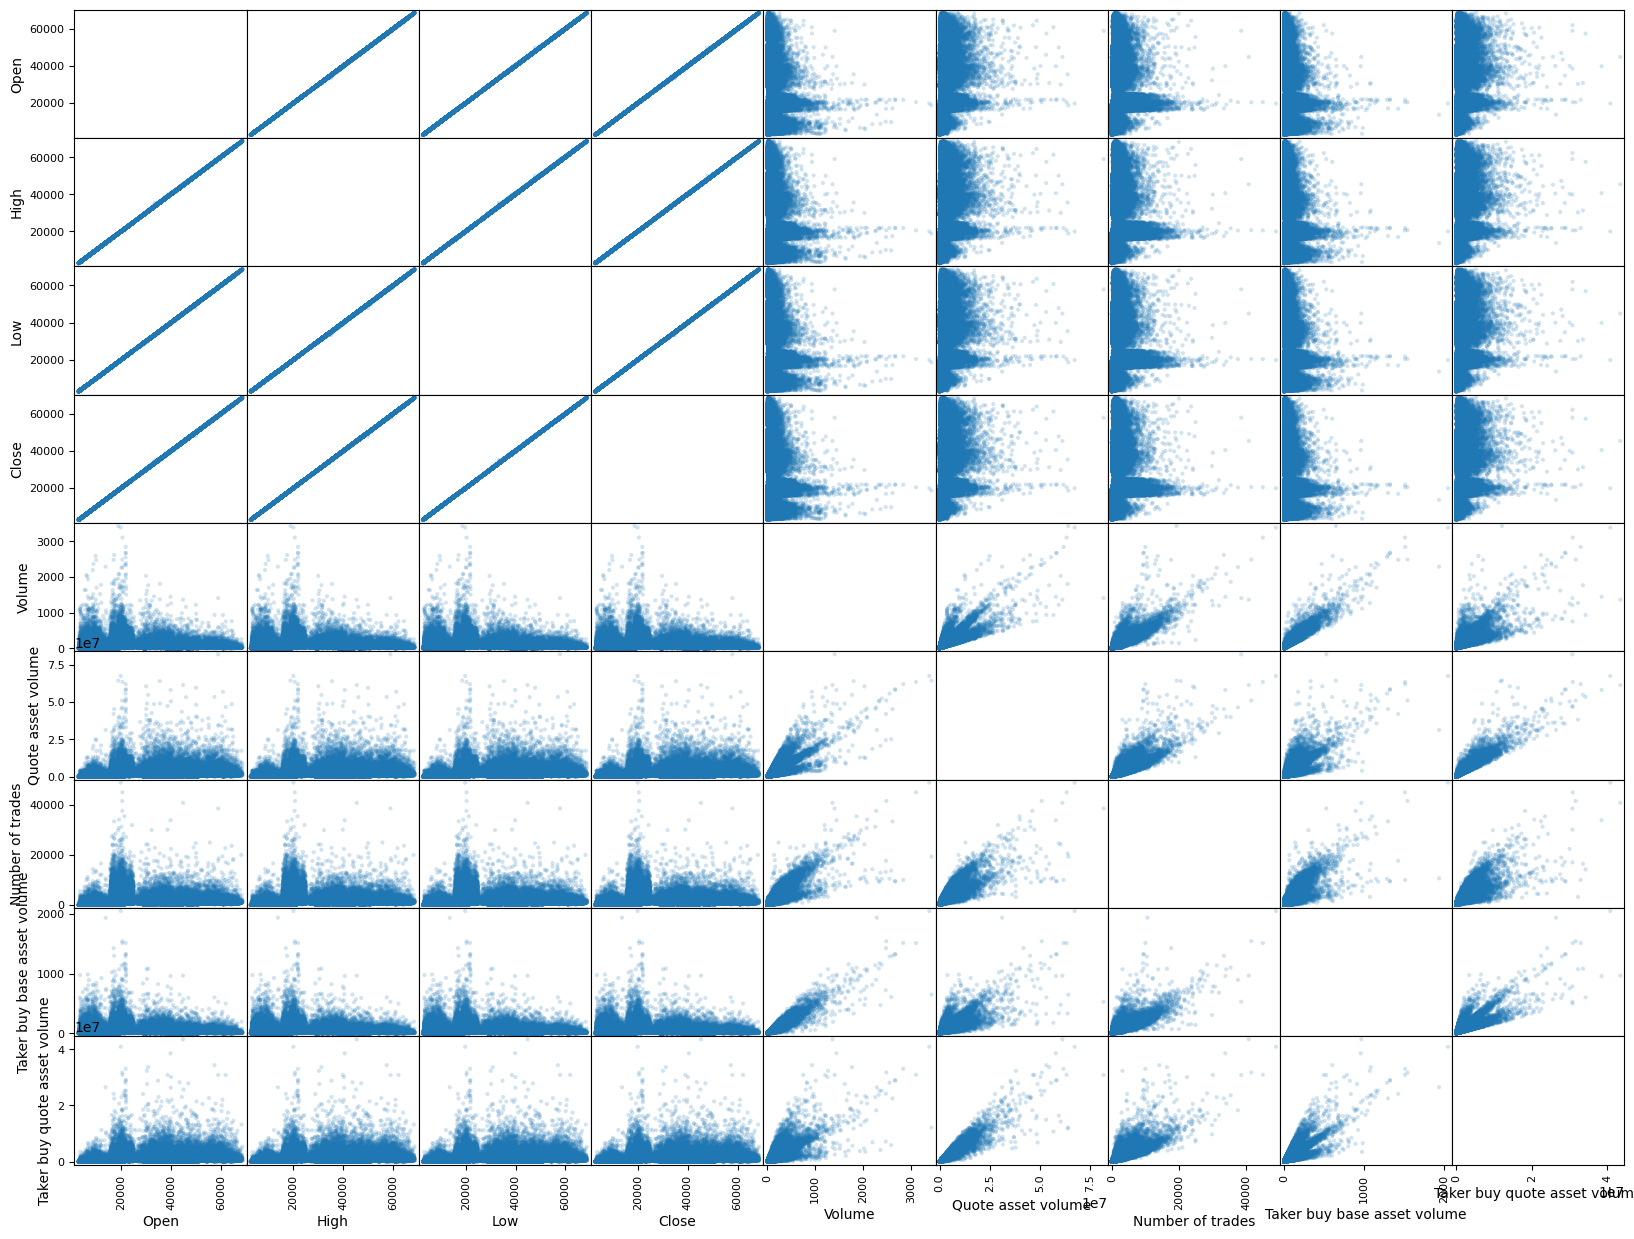

In [12]:
small_btc=btc.sample(frac=0.1)  # 10% данных
graph=pd.plotting.scatter_matrix(small_btc, figsize=(20,15), diagonal=None, alpha=0.2)
  

Получаем, достаточно очевидный исход. Параметры, связанные непосредственно с ценой имеют сильную корреляцию и, следовательно, практически прямую линию на графике рассеивания. Объем торогов и совершенные сделки не зависят ни от одого из этих параметров, поэтому на графиках видим точки в разнобой. Напротив, объемы и покупки имееют небольшую зависимость, т.к. покупки и создают объемы.

Построим матрицу корреляции:

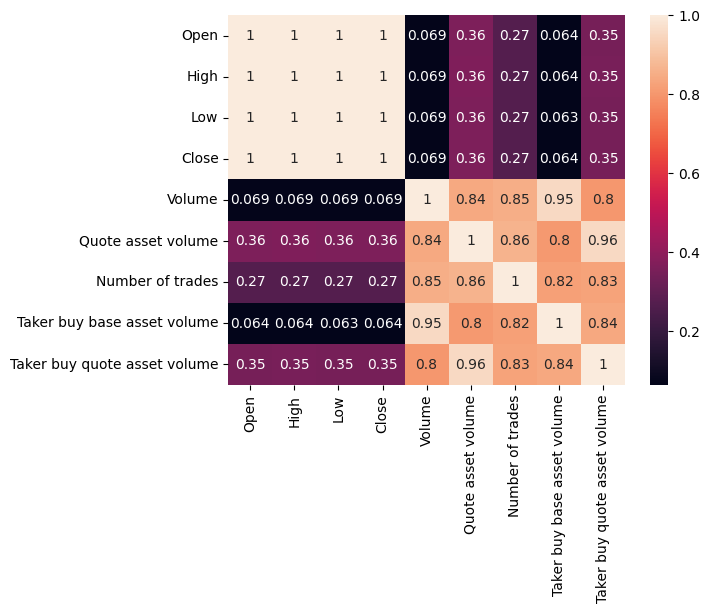

In [10]:
corr = sb.heatmap(
    btc.corr(),
    annot=True
)

1. Open, High, Low, Close:

   • Все четыре показателя (Open, High, Low, Close) имеют корреляцию 1 между собой, что указывает на полную прямую корреляцию. Это ожидаемо, так как эти значения цены тесно связаны между собой в процессе торгов за день.

2. Volume:

   • Volume имеет слабую положительную корреляцию с Open, High, Low и Close (0.069).

   • Сильная положительная корреляция с Quote asset volume (0.84), Number of trades (0.85), Taker buy base asset volume (0.95) и Taker buy quote asset volume (0.8).

3. Quote asset volume:

   • Сильная положительная корреляция с Volume (0.84), Number of trades (0.85), Taker buy base asset volume (0.8) и Taker buy quote asset volume (0.96).

4. Number of trades:

   • Умеренная положительная корреляция с Open, High, Low и Close (0.27).

   • Сильная положительная корреляция с Volume (0.85), Quote asset volume (0.85), Taker buy base asset volume (0.82) и Taker buy quote asset volume (0.83).

5. Taker buy base asset volume:

   • Сильная положительная корреляция с Volume (0.95), Quote asset volume (0.8), Number of trades (0.82) и Taker buy quote asset volume (0.84).

   • Слабая положительная корреляция с Open, High, Low и Close (около 0.064).

6. Taker buy quote asset volume:

   • Умеренная положительная корреляция с Open, High, Low и Close (0.35).

   • Сильная положительная корреляция с Quote asset volume (0.96), Number of trades (0.83) и Taker buy base asset volume (0.84).

Таким образом, Volume, Quote asset volume, Number of trades, Taker buy base asset volume и Taker buy quote asset volume имеют сильные корреляции друг с другом, что указывает на взаимосвязь этих показателей в торговой активности. Open, High, Low и Close тесно коррелируют друг с другом, но слабо коррелируют с другими показателями.